# Collective dephase and individual dephase in One Axis Twisting(OAT) <br>

OAT Hamiltonian :
\begin{equation}
H = \chi J_z^2
\end{equation}

Master equation :
\begin{equation}
\dot{\rho}(t)=-\frac i\hbar[H(t),\rho(t)]+\sum_n\frac12\left[2C_n\rho(t)C_n^\dagger-\rho(t)C_n^\dagger C_n-C_n^\dagger C_n\rho(t)\right]
\end{equation}

Initial state :
\begin{equation}
|\psi\rangle = |\theta = \pi/2, \phi = 0\rangle
\end{equation}

<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

<div class="center">

| Collapse operators | Decay rate  | 
| :--------  | :-----  |
| $J_-$ | $\gamma_c$ |
| $\sigma_-^i$ | $\gamma_i$  |

</div>


In [112]:
import qutip as qt
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from qutip import piqs

In [6]:
print(f'qutip version {qt.__version__}')
print(f'matplotlib version {mpl.__version__}')
print(f'numpy version {np.__version__}')

qutip version 4.7.1
matplotlib version 3.5.2
numpy version 1.24.4


In [31]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = False
# 设置字体粗细
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'

plt.rcParams['axes.titlesize'] = 25  
plt.rcParams['legend.fontsize'] = 25  
plt.rcParams['xtick.labelsize'] = 25  
plt.rcParams['ytick.labelsize'] = 25  

## Collective operator with Collective dephasing

In [113]:
χ = 1
N = 5
Jm = qt.piqs.jspin(N,"-")
Jp = qt.piqs.jspin(N,"+")
[Jx,Jy,Jz]= qt.piqs.jspin(N)
H = χ*Jz**2
γc = 0.01
theta = np.pi/2
phi = 0
ψ0= qt.piqs.css(N=N,x = theta,y=phi ,coordinates="polar")

In [116]:
tlist = np.linspace(0,20,501)
result = qt.mesolve(H,ψ0,tlist,c_ops=[np.sqrt(γc)*Jm],e_ops=[Jx,Jy,Jz])

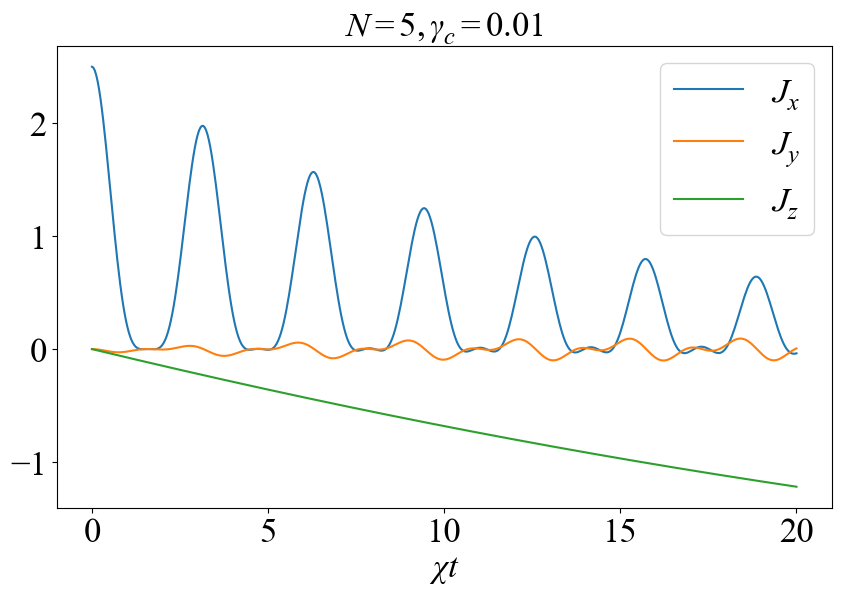

In [117]:
fig,ax = plt.subplots(nrows= 1,ncols =1,figsize = (10,6))
ax.plot(tlist,result.expect[0],label = r'$J_x$')
ax.plot(tlist,result.expect[1],label = r'$J_y$')
ax.plot(tlist,result.expect[2],label = r'$J_z$')
ax.set_xlabel(r'$\chi t$',fontsize= 25)
ax.set_title(rf'$N={N},\gamma_c = 0.01$')
ax.legend()

## Individual operator with Individual and collective dephasing

In [127]:
def get_sigmaz_operator(i, N):
    sigmaz_list = [qt.sigmaz() if j == i else qt.qeye(2) for j in range(N)]
    return qt.tensor(sigmaz_list)
def get_sigmax_operator(i, N):
    sigmax_list = [qt.sigmax() if j == i else qt.qeye(2) for j in range(N)]
    return qt.tensor(sigmax_list)
def get_sigmay_operator(i, N):
    sigmay_list = [qt.sigmay() if j == i else qt.qeye(2) for j in range(N)]
    return qt.tensor(sigmay_list)



In [128]:
N = 5
χ = 1

Jzi = 1/2*sum(get_sigmaz_operator(i,N) for i in range(0,N))
Jxi = 1/2*sum(get_sigmax_operator(i,N) for i in range(0,N))
Jyi = 1/2*sum(get_sigmay_operator(i,N) for i in range(0,N))

Jmi = Jxi - 1.j*Jyi 
Jpi = Jxi + 1.j*Jyi

Hi = χ*Jzi**2
ψ0i = qt.tensor([1/np.sqrt(2)*(qt.basis(2,0)+qt.basis(2,1))]*N)

γc = 0.01
γi = 0

cops = []
for i in range(0,N):
    cops.append(np.sqrt(γi)*1/2*(get_sigmax_operator(i, N)-1.j*get_sigmay_operator(i, N))) 

cops.append(np.sqrt(γc)*Jmi)

In [129]:
tlist = np.linspace(0,20,501)
resulti = qt.mesolve(Hi,ψ0i,tlist,c_ops=cops,e_ops=[Jxi,Jyi,Jzi])

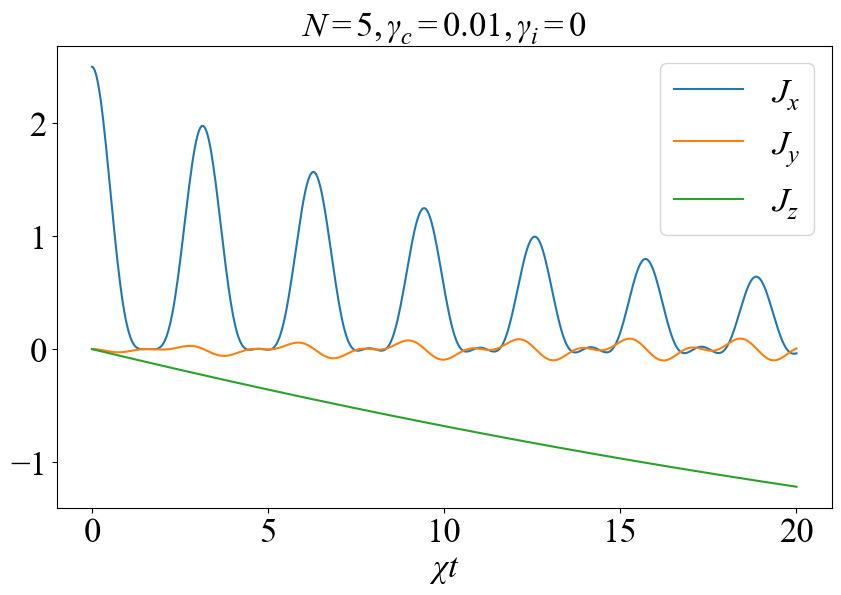

In [130]:
fig,ax = plt.subplots(nrows= 1,ncols =1,figsize = (10,6))
ax.plot(tlist,resulti.expect[0],label = r'$J_x$')
ax.plot(tlist,resulti.expect[1],label = r'$J_y$')
ax.plot(tlist,resulti.expect[2],label = r'$J_z$')
ax.set_xlabel(r'$\chi t$',fontsize= 25)
ax.set_title(rf'$N={N},\gamma_c = 0.01,\gamma_i = 0$')
ax.legend()

In [131]:
γc = 0.01
γi = 0.01

cops = []
for i in range(0,N):
    cops.append(np.sqrt(γi)*1/2*(get_sigmax_operator(i, N)-1.j*get_sigmay_operator(i, N))) 

cops.append(np.sqrt(γc)*Jmi)

tlist = np.linspace(0,20,501)
result_ic = qt.mesolve(Hi,ψ0i,tlist,c_ops=cops,e_ops=[Jxi,Jyi,Jzi])

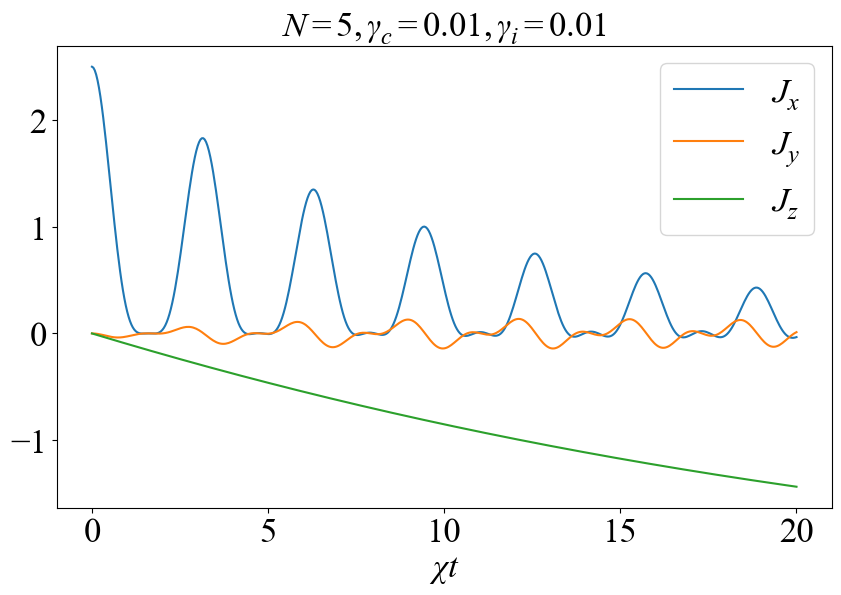

In [132]:
fig,ax = plt.subplots(nrows= 1,ncols =1,figsize = (10,6))
ax.plot(tlist,result_ic.expect[0],label = r'$J_x$')
ax.plot(tlist,result_ic.expect[1],label = r'$J_y$')
ax.plot(tlist,result_ic.expect[2],label = r'$J_z$')
ax.set_xlabel(r'$\chi t$',fontsize= 25)
ax.set_title(rf'$N={N},\gamma_c ={γc},\gamma_i = {γi}$')
ax.legend()

In [90]:
qt.sigmam() == 1/2*(qt.sigmax() - 1.j*qt.sigmay())

True

## with piqs

In [124]:
N = 5
nds = qt.piqs.num_dicke_states(N)
[Jx,Jy,Jz] = qt.piqs.jspin(N)
Jp = qt.piqs.jspin(N,'+')
Jm = qt.piqs.jspin(N,'-')
χ = 1
H = χ*Jz**2
γc = 0.01
γi = 0.01
system = qt.piqs.Dicke(N)
system.hamiltonian = H
system.emission = γi
system.collective_emission = γc

liouv = system.liouvillian()

theta = np.pi/2
phi = 0
ψ0= qt.piqs.css(N=N,x = theta,y=phi ,coordinates="polar")

In [125]:
tlist = np.linspace(0,20,501)
result = qt.mesolve(liouv,ψ0,tlist,[],e_ops=[Jx,Jy,Jz])

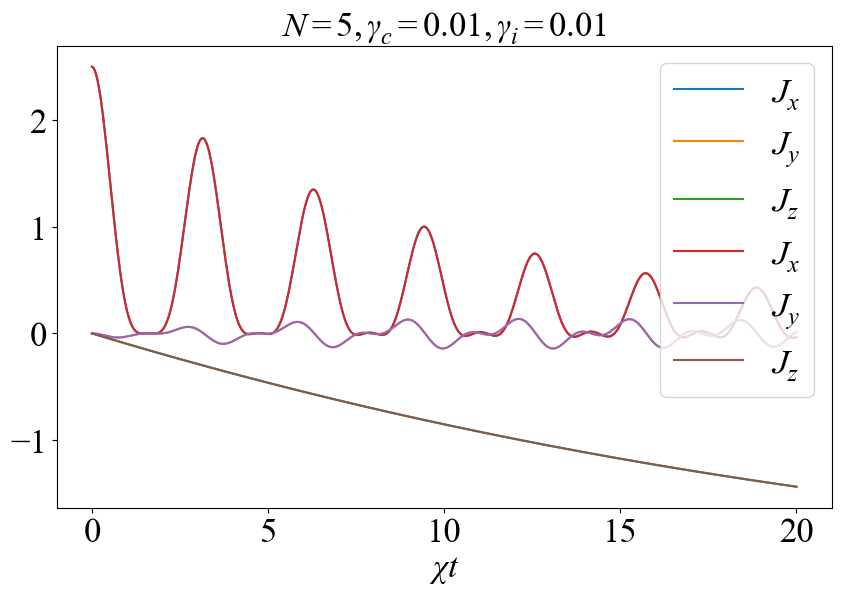

In [138]:
fig,ax = plt.subplots(nrows= 1,ncols =1,figsize = (10,6))
ax.plot(tlist,result.expect[0],label = r'$J_x$')
ax.plot(tlist,result.expect[1],label = r'$J_y$')
ax.plot(tlist,result.expect[2],label = r'$J_z$')
ax.plot(tlist,result_ic.expect[0],label = r'$J_x$')
ax.plot(tlist,result_ic.expect[1],label = r'$J_y$')
ax.plot(tlist,result_ic.expect[2],label = r'$J_z$')
ax.set_xlabel(r'$\chi t$',fontsize= 25)
ax.set_title(rf'$N={N},\gamma_c ={γc},\gamma_i = {γi}$')
ax.legend()